Présenté par : **OUMELLAIK FATIMA-ZAHRA** & **Assaadi soukayna**

Dans ce travail **Recognition of Tifnagh Characters Using Optimized Convolutional Neural Network** on a deux architecture une pour les **RGB** et une **binaire**

# **` RGB:`**

# **Importation des données**



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Chargement et décompression de dataset
data_dir = '/content/drive/MyDrive/archive.zip'
import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/dataTifinagh')

# **Importation des bibliothèques**


In [ ]:
import pathlib
import os
import cv2
import numpy as np
import sys
import datetime
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras import layers
from keras.optimizers import Adam
# graph
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# matrice de conf
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Verification dataset

In [ ]:
data_dir = pathlib.Path('/content/dataTifinagh/AMHCD_64/AMHCD_64')
print("The data directory : {}".format(data_dir))

The data directory : /content/dataTifinagh/AMHCD_64/AMHCD_64


In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("/content/dataTifinagh/amhcd_64/AMHCD_64/ya/ya_1.jpeg")
plt.subplot(121)
plt.imshow(image)
plt.title("ya_1")
image.shape

(64, 64, 3)

# Diviser les données

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
data="/content/dataTifinagh/AMHCD_64/AMHCD_64"

In [ ]:
splitfolders.ratio(data, output="/content/outputTifinagh",seed=1337,ratio=(.56,.14,.3), group_prefix=None)

Copying files: 25740 files [00:04, 5346.68 files/s]


# Redimention des images

In [ ]:
img_height = 60
img_width = 60


In [ ]:
#Les données de Train
Train="/content/outputTifinagh/train"
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  Train,image_size=(img_width, img_height),
  )

Found 14388 files belonging to 33 classes.


In [ ]:
#Les données de validation
Valid="/content/outputTifinagh/val"
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
  Valid,image_size=(img_width, img_height),
  )

Found 3597 files belonging to 33 classes.


In [ ]:
#les données de Test
Test="/content/outputTifinagh/test"
test_data = tf.keras.preprocessing.image_dataset_from_directory(
  Test,image_size=(img_width, img_height)
  )

Found 7755 files belonging to 33 classes.


# Construction du model

In [ ]:
model = Sequential()
model.add(Conv2D(20, (5, 5),padding="same",strides = 2, input_shape=(60, 60, 3)))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2),strides = 2))

model.add(Conv2D(16, (3, 3),padding="same",strides = 2))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2),strides = 2))

model.add(Conv2D(60, (3, 3),padding="same",strides = 2))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2),strides = 2))
model.add(Flatten())
model.add(Dense(33, activation='softmax'))
opt = Adam(lr=0.001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 20)        1520      
                                                                 
 activation (Activation)     (None, 30, 30, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2896      
                                                                 
 activation_1 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                    

#  Compilation du model

In [ ]:
model.compile(optimizer=opt,
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],)

Entrainement du model

In [ ]:
historique = model.fit(
             train_data,
             validation_data=validation_data,
             epochs=30
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


450/450 [==============================] - 20s 23ms/step - loss: 4.3074 - accuracy: 0.1136 - val_loss: 2.5865 - val_accuracy: 0.2202
Epoch 2/30
450/450 [==============================] - 10s 22ms/step - loss: 1.8751 - accuracy: 0.4196 - val_loss: 1.2691 - val_accuracy: 0.6108
Epoch 3/30
450/450 [==============================] - 6s 13ms/step - loss: 1.0046 - accuracy: 0.6904 - val_loss: 0.8824 - val_accuracy: 0.7267
Epoch 4/30
450/450 [==============================] - 10s 23ms/step - loss: 0.6235 - accuracy: 0.8094 - val_loss: 0.4970 - val_accuracy: 0.8502
Epoch 5/30
450/450 [==============================] - 8s 17ms/step - loss: 0.4776 - accuracy: 0.8549 - val_loss: 0.4171 - val_accuracy: 0.8721
Epoch 6/30
450/450 [==============================] - 7s 16ms/step - loss: 0.3848 - accuracy: 0.8835 - val_loss: 0.4471 - val_accuracy: 0.8641
Epoch 7/30
450/450 [==============================] - 7s 16ms/step - loss: 0.3323 - accuracy: 0.8960 - val_loss: 0.3603 - val_accuracy: 0.8966
Epoch 8

# Evaluation

In [ ]:
score = model.evaluate(validation_data, verbose=1)
print('Model RGB:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

113/113 [==============================] - 1s 10ms/step - loss: 0.2912 - accuracy: 0.9441
Model RGB:
Test loss: 0.2912028729915619
Test accuracy: 0.9441201090812683


In [ ]:
model.evaluate(test_data)

243/243 [==============================] - 3s 10ms/step - loss: 0.3571 - accuracy: 0.9389


[0.35714924335479736, 0.9388781189918518]

In [ ]:
import matplotlib.pyplot as plt
def summarize_diagnostics(history):
	plt.figure(1)
	plt.subplot(211)
	plt.title('Cross Entropy Loss(courbe d\'erreur)')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='red', label='test')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	# plot accuracy
	plt.figure(2)
	plt.subplot(212)
	plt.title('Classification Accuracy(courbe de précision)')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='red', label='test')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.show()

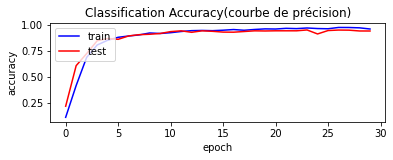

In [ ]:
summarize_diagnostics(historique)

In [ ]:
import tensorflow_datasets as tfds
TRAIN_BUF=1000
BATCH_SIZE=30000
dataset_testRGB = keras.utils.image_dataset_from_directory(batch_size=BATCH_SIZE,
                                    directory=data_dir,
                                    shuffle=True,
                                    image_size=(60, 60),
                                    subset="validation",
                                    label_mode='categorical',
                                    validation_split=0.99,
                                    seed=18)
#le premier epoch
dataset_testRGB=dataset_testRGB.take(1)
#chargement les images en tableau numpy pour la predicition
for image, label in tfds.as_numpy(dataset_testRGB):
  Img_testRGB = image
  labelsRGB=label
  labelsRGB=np.argmax(labelsRGB, axis=1)

Found 25740 files belonging to 33 classes.
Using 25482 files for validation.


In [ ]:
pred = model.predict(Img_testRGB)
#classes predites à partir des hot encoding
classesRGB=np.argmax(pred,axis=1)

797/797 [==============================] - 2s 2ms/step


Matrice de Confusion

In [ ]:
MC_RGB=np.array(tf.math.confusion_matrix(labelsRGB,classesRGB))
MC_RGB

array([[769,   0,   0, ...,   0,   0,   0],
       [  0, 761,   1, ...,   0,   0,   0],
       [  0,   0, 747, ...,   0,   0,   9],
       ...,
       [  1,   1,   0, ..., 761,   0,   4],
       [  5,   0,   1, ...,   5, 754,   0],
       [  0,   9,   2, ...,  16,   0, 737]], dtype=int32)

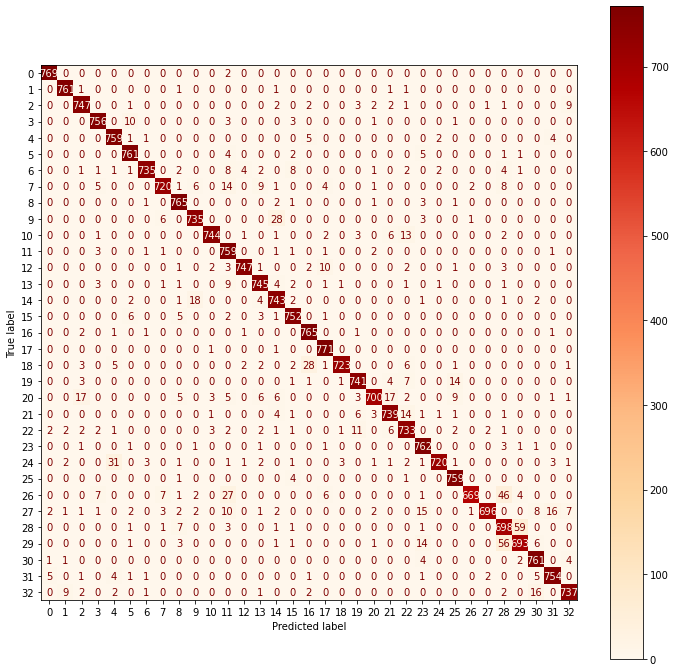

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmp =ConfusionMatrixDisplay(confusion_matrix=MC_RGB)
fig, ax = plt.subplots(figsize=(12,12))
cmp.plot(ax=ax,cmap=plt.cm.OrRd)

# **` Binaire:`**

# Prétraitement des données(diviser les données, rgb to binaire, redimension..)

In [ ]:
fdata="/content/outputTifinagh/train"
train_data_binary = tf.keras.preprocessing.image_dataset_from_directory(
  fdata,
  label_mode='categorical',
  color_mode='grayscale',
  image_size=(img_width, img_height),
  )
ffdata="/content/outputTifinagh/test"
test_data_binary = tf.keras.preprocessing.image_dataset_from_directory(
  ffdata,
  label_mode='categorical',
  color_mode='grayscale',
  image_size=(img_width, img_height),
  )
fffdata="/content/outputTifinagh/val"
val_data_binary = tf.keras.preprocessing.image_dataset_from_directory(
  fffdata,
  label_mode='categorical',
  color_mode='grayscale',
  image_size=(img_width, img_height),
  )


Found 14388 files belonging to 33 classes.
Found 7755 files belonging to 33 classes.
Found 3597 files belonging to 33 classes.


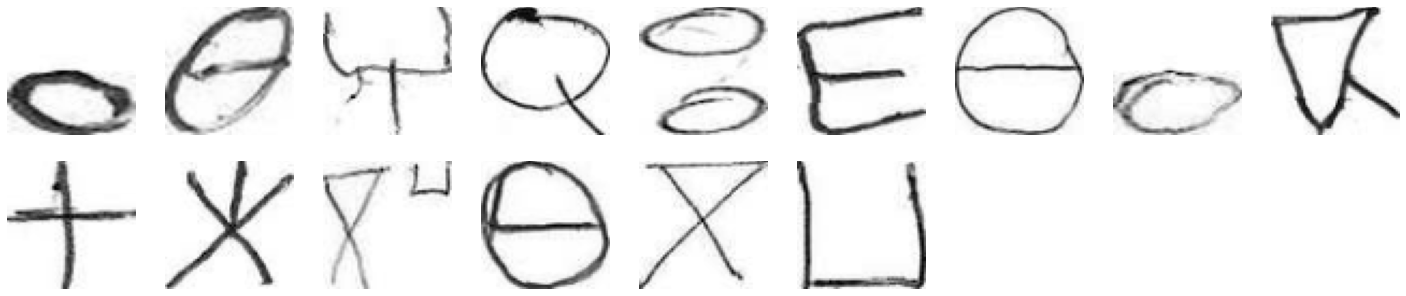

In [ ]:
# afficher les 15 premiers
plt.figure(figsize=(25, 25))
for images, labels in train_data_binary.take(1):
  for i in range(15):
    ax = plt.subplot(9, 9, i + 1)
    img=images[i].numpy().astype("uint8")
    plt.imshow(img[:,:,0],cmap='gray')
    dim=np.array(images[i]).shape
    dim=" ("+str(dim[0]) +","+ str(dim[1]) +","+ str(dim[2]) +")"
    plt.axis("off")

In [ ]:
model1 = Sequential()
model1.add(Conv2D(20, (5, 5),padding="same",strides = 2, input_shape=(60, 60, 1)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D((2, 2),strides = 2))

model1.add(Conv2D(16, (3, 3),padding="same",strides = 2))
model1.add(Activation("relu"))
model1.add(MaxPooling2D((2, 2),strides = 2))

model1.add(Conv2D(60, (3, 3),padding="same",strides = 2))
model1.add(Activation("relu"))
model1.add(MaxPooling2D((2, 2),strides = 2))

model1.add(Flatten())
model1.add(Dense(33, activation='softmax'))
opt = Adam(lr=0.001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model1.compile(optimizer=opt,
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],)

In [ ]:
historique1 = model1.fit(
             train_data_binary,
             validation_data=val_data_binary,
             epochs=30
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


450/450 [==============================] - 6s 13ms/step - loss: 3.5967 - accuracy: 0.2271 - val_loss: 1.3894 - val_accuracy: 0.5702
Epoch 2/30
450/450 [==============================] - 6s 13ms/step - loss: 0.9534 - accuracy: 0.6961 - val_loss: 0.6195 - val_accuracy: 0.8115
Epoch 3/30
450/450 [==============================] - 6s 13ms/step - loss: 0.4669 - accuracy: 0.8566 - val_loss: 0.3693 - val_accuracy: 0.8855
Epoch 4/30
450/450 [==============================] - 7s 15ms/step - loss: 0.3221 - accuracy: 0.8989 - val_loss: 0.3603 - val_accuracy: 0.8921
Epoch 5/30
450/450 [==============================] - 8s 18ms/step - loss: 0.2390 - accuracy: 0.9259 - val_loss: 0.2583 - val_accuracy: 0.9219
Epoch 6/30
450/450 [==============================] - 6s 13ms/step - loss: 0.2013 - accuracy: 0.9377 - val_loss: 0.2084 - val_accuracy: 0.9358
Epoch 7/30
450/450 [==============================] - 6s 13ms/step - loss: 0.1715 - accuracy: 0.9453 - val_loss: 0.2425 - val_accuracy: 0.9316
Epoch 8/30

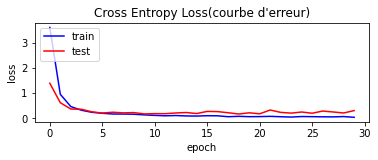

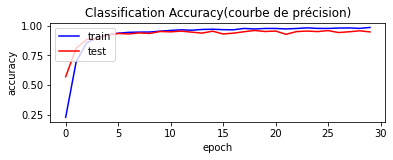

In [ ]:
summarize_diagnostics(historique1)

In [ ]:
score = model1.evaluate(val_data_binary, verbose=1)
print('Model Binaire:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

113/113 [==============================] - 1s 9ms/step - loss: 0.3073 - accuracy: 0.9488
Model Binaire:
Test loss: 0.3072625398635864
Test accuracy: 0.9488462805747986


In [ ]:
import tensorflow_datasets as tfds
TRAIN_BUF=1000
BATCH_SIZE=30000
dataset_testB = keras.utils.image_dataset_from_directory(batch_size=BATCH_SIZE,
                                    directory=data_dir,
                                    shuffle=True,
                                    image_size=(60, 60),
                                    subset="validation",
                                    label_mode='categorical',
                                    color_mode='grayscale',
                                    validation_split=0.99,
                                    seed=18)
#on prend le premier epoch
dataset_testB=dataset_testB.take(1)
#chargement les images en tableau numpy pour la predicition
for image, label in tfds.as_numpy(dataset_testB):
  Img_testB = image
  labelsB=label
  labelsB=np.argmax(labelsB, axis=1)

Found 25740 files belonging to 33 classes.
Using 25482 files for validation.


In [ ]:
pred1 = model1.predict(Img_testB)
#classes predites à partir des hot encoding
classesB=np.argmax(pred,axis=1)

797/797 [==============================] - 2s 2ms/step


In [ ]:
MC_B=np.array(tf.math.confusion_matrix(labelsB,classesB))
MC_B

array([[769,   0,   0, ...,   0,   0,   0],
       [  0, 761,   1, ...,   0,   0,   0],
       [  0,   0, 747, ...,   0,   0,   9],
       ...,
       [  1,   1,   0, ..., 761,   0,   4],
       [  5,   0,   1, ...,   5, 754,   0],
       [  0,   9,   2, ...,  16,   0, 737]], dtype=int32)

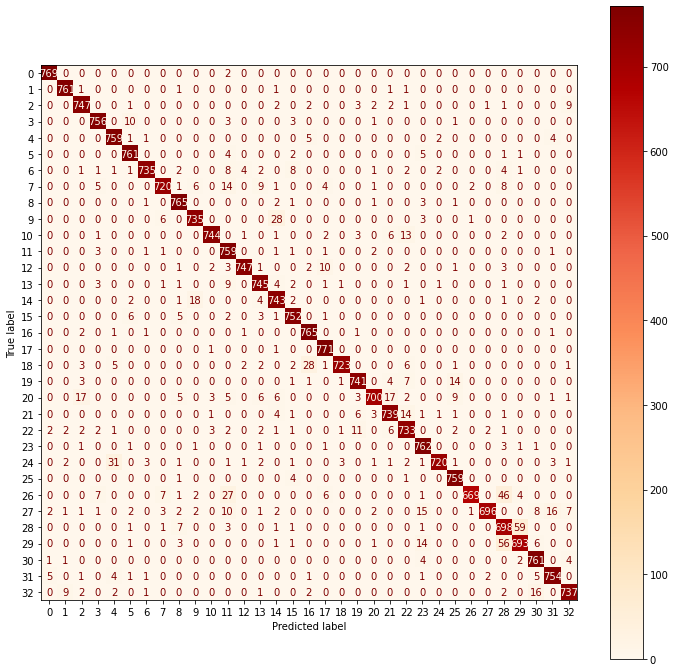

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmp =ConfusionMatrixDisplay(confusion_matrix=MC_B)
fig, ax = plt.subplots(figsize=(12,12))
cmp.plot(ax=ax,cmap=plt.cm.OrRd)
plt.show()